# **Customer Segmentation**
Customer segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers (known as segments) based on some type of shared characteristics. In dividing or segmenting markets, researchers typically look for common characteristics such as shared needs, common interests, similar lifestyles or even similar demographic profiles. The overall aim of segmentation is to identify high yield segments – that is, those segments that are likely to be the most profitable or that have growth potential – so that these can be selected for special attention (i.e. become target markets). [Source: Wikipedia]

## **Define the Problem**
In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the UCI Machine Learning Repository. 

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. We shall get insights on the customer spending 

### **Attributes Information**

1)FRESH: annual spending (m.u.) on fresh products (Continuous)

2) MILK: annual spending (m.u.) on milk products (Continuous)

3) GROCERY: annual spending (m.u.)on grocery products (Continuous)

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)

8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

## Read the Data

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import seaborn as sns
import matplotlib.pyplot as plt
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Remove warning from the notebook
import warnings 
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#upload the data 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
#read the data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration


In [0]:
#samples from the dataset
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
381,1,3,17770,4591,1617,9927,246,532
359,1,3,796,5878,2109,340,232,776
42,2,3,10850,7555,14961,188,6899,46
305,2,2,243,12939,8852,799,3909,211
419,1,3,8861,3783,2223,633,1580,1521


In [0]:
# statiscal summary of the dataset
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
#infomation on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [0]:
# dataset shape
df.shape

(440, 8)

-The dataset has 440 records and 8 variables

## Tidying the Data

In [0]:
# Null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

- No null values in the dataset

In [0]:
# Check for duplicated data
df.duplicated().any()

False

- No duplicated record in the dataset

In [0]:
# drop uneccessary columns
#drop channel and region to remail with just the products 
df.drop(["Channel","Region"], axis=1,inplace = True)

In [0]:
# confirm remaining rows
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## EDA

### Univariate Analysis
Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable. Since it's a single variable it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

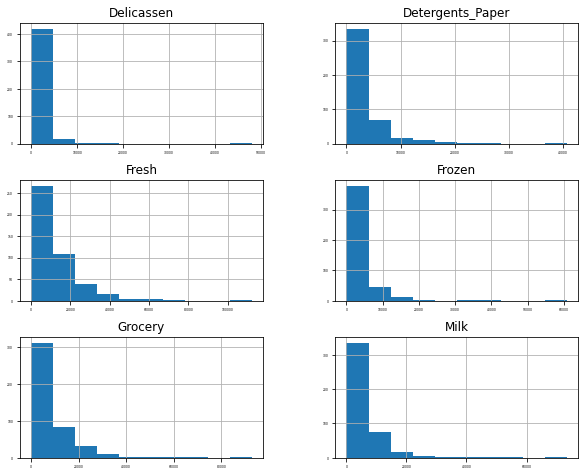

In [0]:
# histograms
df.hist(figsize=(10,8), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()

- All columns have data that are skewed to the right

### Multivariate Analysis

No handles with labels found to put in legend.


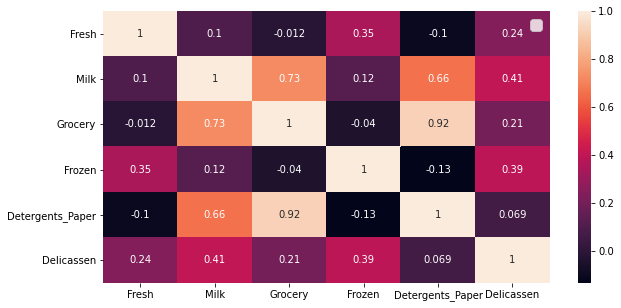

In [0]:
# Display the correlation heatmap
corr = df.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

The scatter matrix below may not show any correlation between features.

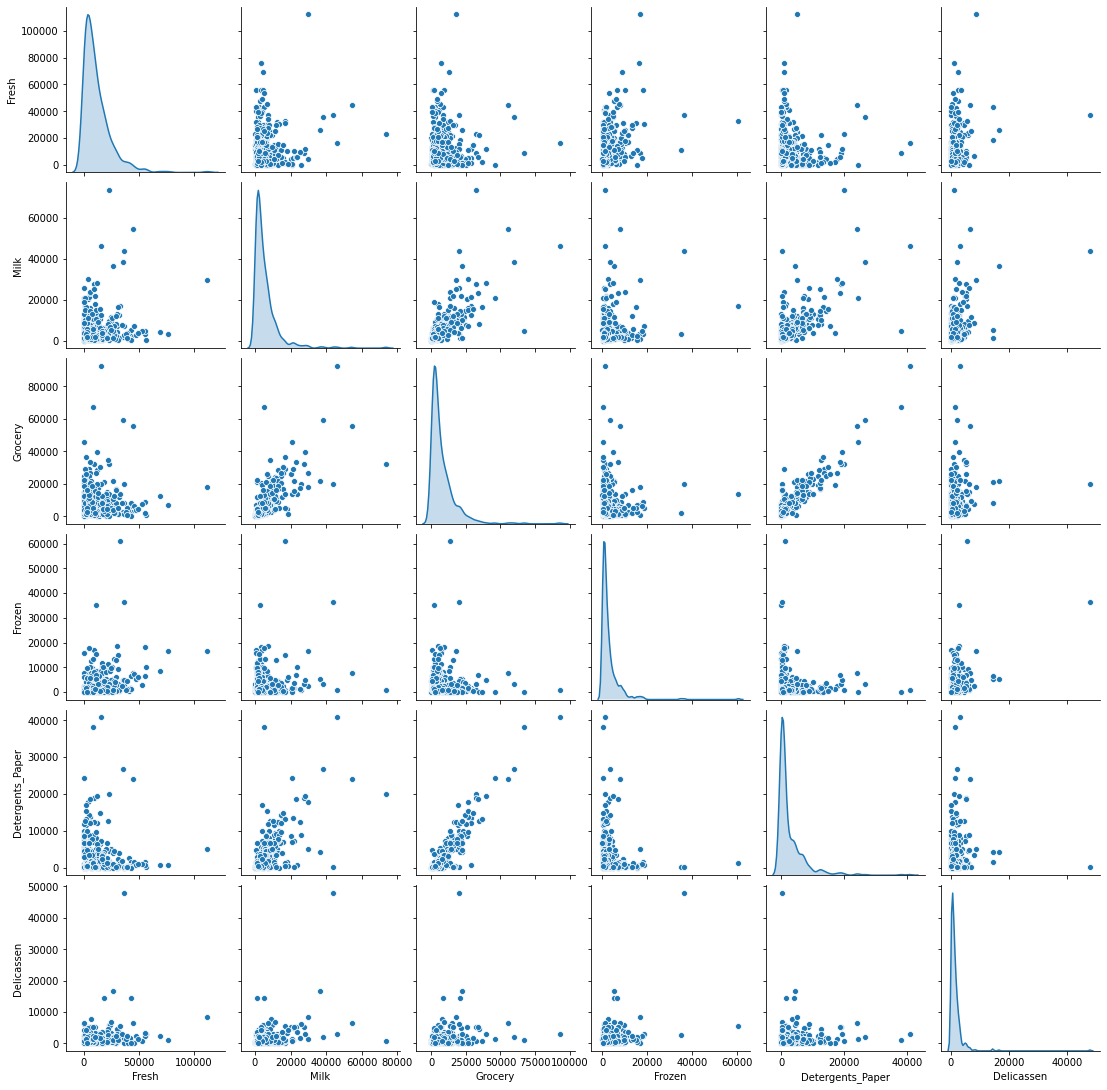

In [0]:
# pairplot
sns.pairplot(df, diag_kind = 'kde')

- Grocery and Detergents_Paper are positively related
- Milk and Grocery are also related

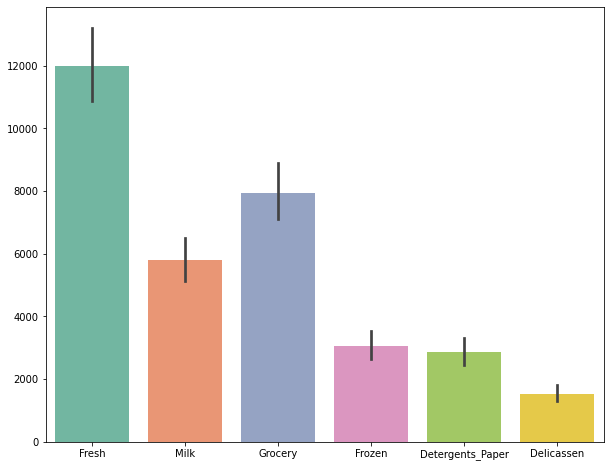

In [0]:
plt.figure(figsize = (10,8))
_ = sns.barplot(data=df, palette="Set2")

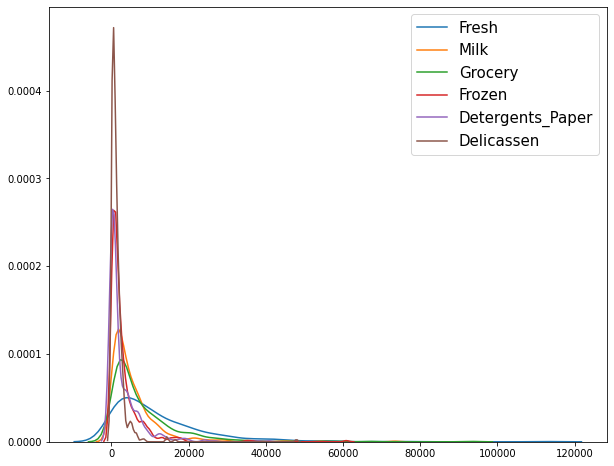

In [0]:
plt.figure(figsize = (10,8))

for cols in df.columns.values:
    ax = sns.kdeplot(df[cols])
    ax.legend(loc=0, prop={'size': 15})

## Data Prepation

### Normalization
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply normalization.  A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

- Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.

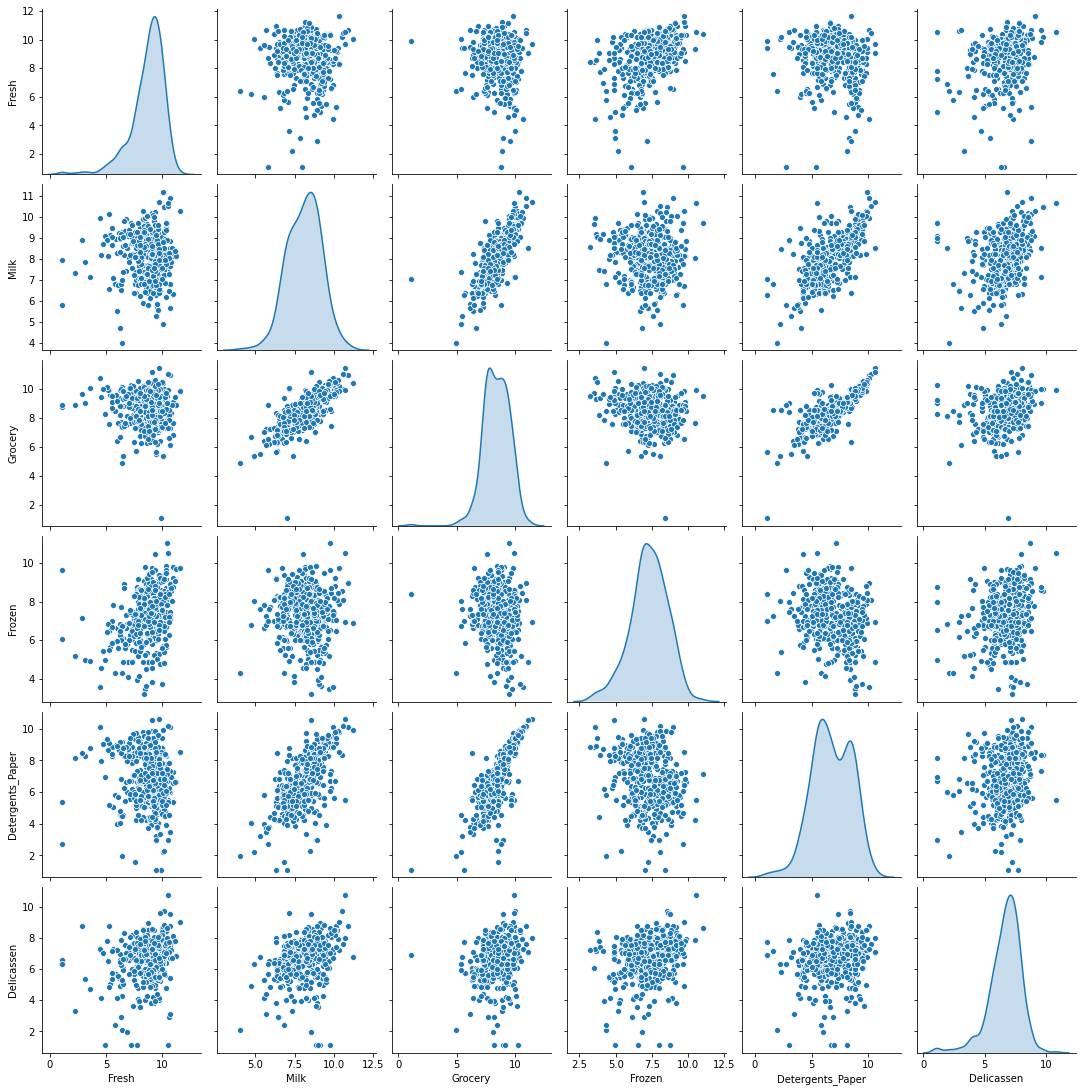

In [0]:
# Scale the data using the natural logarithm
log_data = np.log(df)

# Produce a scatter matrix for each pair of newly-transformed features
_ = sns.pairplot(log_data, diag_kind = 'kde')

- After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before)

### Standardization
Our dataset has a lot of variation in the magnitude of the data. Some variables havelow magnitude, while others have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude using standard scaler

when standardizing it makes the assumption that the dataset is bell_shaped(normalized)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(log_data)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-1.862147e-16,-3.691492e-16,-2.556036e-16,1.826822e-16,1.396610e-16,6.550316e-16
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-5.162332e+00,-3.808515e+00,-6.585828e+00,-3.181814e+00,-3.308406e+00,-4.251391e+00
25%,-4.616414e-01,-7.277472e-01,-6.875511e-01,-5.391077e-01,-7.200844e-01,-4.989215e-01
50%,2.149246e-01,6.953960e-02,2.322023e-02,2.259570e-02,-4.709210e-02,1.584857e-01
75%,6.808223e-01,7.030903e-01,7.468678e-01,6.815637e-01,8.658021e-01,6.427625e-01
max,1.959605e+00,2.855165e+00,2.687964e+00,2.895443e+00,2.228613e+00,3.140996e+00


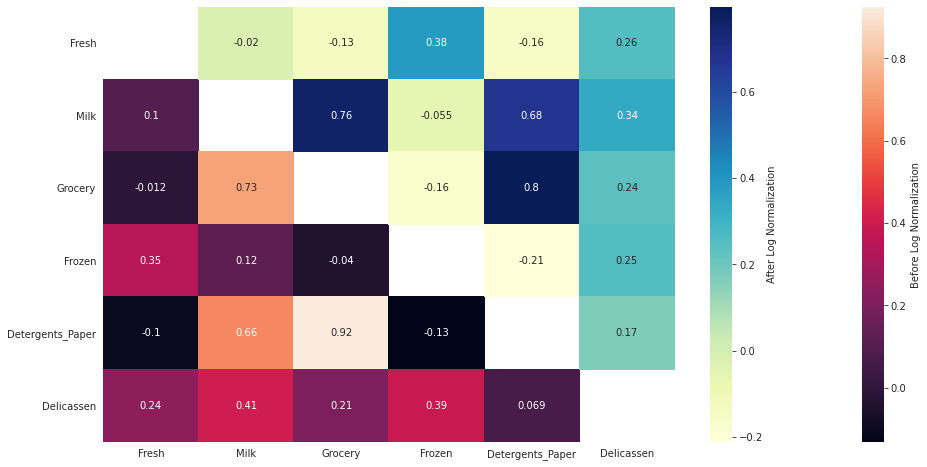

In [0]:
# Display the correlation heatmap
log_corr = log_data.corr()

f = plt.figure(figsize = (16,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr, annot=True, mask=mask, cbar_kws={'label': 'Before Log Normalization'})

mask2 = np.zeros_like(corr)
mask2[np.tril_indices_from(mask2)] = True
with sns.axes_style("white"):
    ax2 = sns.heatmap(log_corr, annot=True, mask=mask2, cmap="YlGnBu", cbar_kws={'label': 'After Log Normalization'})

- After normalizing the data, correlations between the features have changed a little which is evident from the above visualization.

## Modelling 

### K-means
The **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data. 

K-means clustering is a simple approach where we partition our observations in a specified number of non-overlapping clusters. Here, we perform K-means clustering by first deciding the number of clusters='K'. Then we assign each observation to one of these K clusters. The cost function here is the sum of within cluster variation for all the K clusters and our aim is to minimize that. In brief the K-mean algorithm works by first randomly assigning the observations to any of the K-clusters. Then it iterates over the next 2 steps- i). it calculates the centroid for each cluster. A centroid is a vector of mean of p features for all the observations in that particular cluster. ii) then assigning/reassigning the observation to a cluster whose centroid is the nearest to this particular observation. This stops when the results don't change anymore. If we supply new samples, then KMeans remembers the centroids and assign the new samples to the cluster where the centroid is the closest. K-means algorithm gets its name from the process of calculating the centroid from the means of the observations in a cluster.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(scaled_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(scaled_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

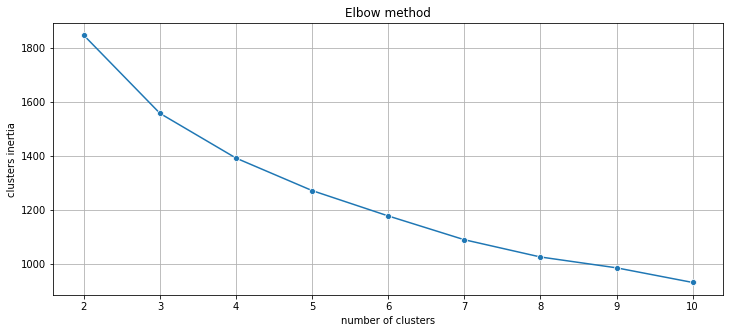

In [0]:
# Find the suitable number of k
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
plt.grid()
plt.show()

In [0]:
ps = pd.DataFrame(scaled_df)
ps.head()

,0,1,2,3,4,5
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


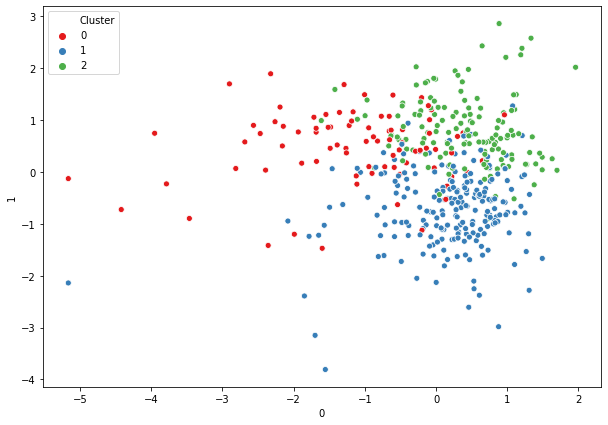

In [0]:
# K=3
km3 = KMeans(n_clusters=3, init='k-means++').fit(ps) # initialise and fit K-Means model

KM3_clustered = ps.copy()
KM3_clustered.loc[:,'Cluster'] = km3.labels_ # append labels to points

fig1, (axes) = plt.subplots(1,figsize=(10,7))


scat_1 = sns.scatterplot(0, 1, data=KM3_clustered,
                hue='Cluster', ax=axes, palette='Set1', legend='full')

plt.show()

In [0]:
# Sizes of the clusters:
clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
clust_sizes.columns = ["KM_size"]
clust_sizes

,KM_size
Cluster,
0,81
1,214
2,145


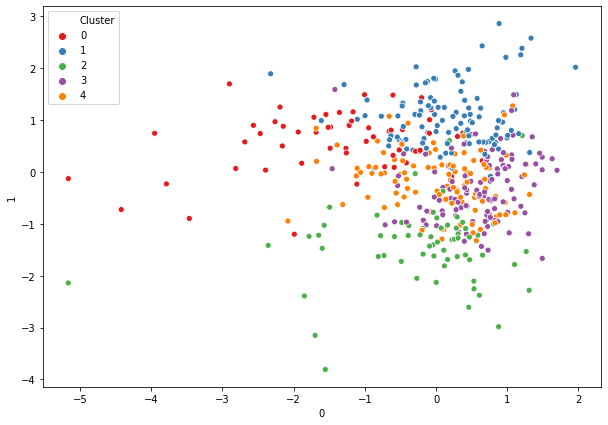

In [0]:
# K=5
km5 = KMeans(n_clusters=5, init='k-means++').fit(ps) # initialise and fit K-Means model

KM5_clustered = ps.copy()
KM5_clustered.loc[:,'Cluster'] = km5.labels_ # append labels to points

fig1, (axes) = plt.subplots(1,figsize=(10,7))
scat_1 = sns.scatterplot(0, 1, data=KM5_clustered,
                hue='Cluster', ax=axes, palette='Set1', legend='full')

plt.show()

In [0]:
# Sizes of the clusters:
clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
clust_sizes.columns = ["KM_size"]
clust_sizes

,KM_size
Cluster,
0,54
1,110
2,63
3,113
4,100


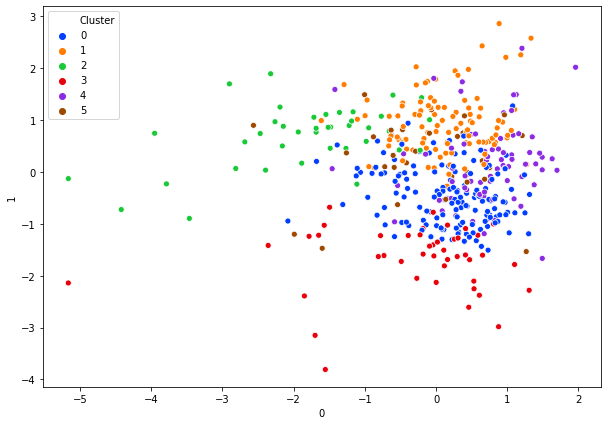

In [0]:
# K=6
km6 = KMeans(n_clusters=6, init='k-means++').fit(ps) # initialise and fit K-Means model

KM6_clustered = ps.copy()
KM6_clustered.loc[:,'Cluster'] = km6.labels_ # append labels to points
fig1, (axes) = plt.subplots(1,figsize=(10,7))


scat_1 = sns.scatterplot(0, 1, data=KM6_clustered,
                hue='Cluster', ax=axes, palette='bright', legend='full')
plt.show()

In [0]:
# Sizes of the clusters:
clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
clust_sizes.columns = ["KM_size"]
clust_sizes

,KM_size
Cluster,
0,147
1,107
2,39
3,44
4,74
5,29


### Hierarchical clustering
Unlike KMeans which needs to be told about the number of clusters to make, hierarchical clustering doesn't need that. It produces a tree like representation of the data that informs the number of clusters and the observations falling in those clusters. This tree like structure is called a dendrogram. Here, we will discuss **agglomerative clustering** which is indicated by an upside down tree. As we move up this tree, leaves start to fuse/merge together into braches indicating that these are similar observations. As we move higher up, braches or banches and leaves start merging. The sooner these leaves/branches merge, more similar these observations are

- In **agglomerative clustering**, each observation is initially considered as a cluster of its own (leaf). Then the most similar clusters are successively merged until there is just one single big cluster (root). 

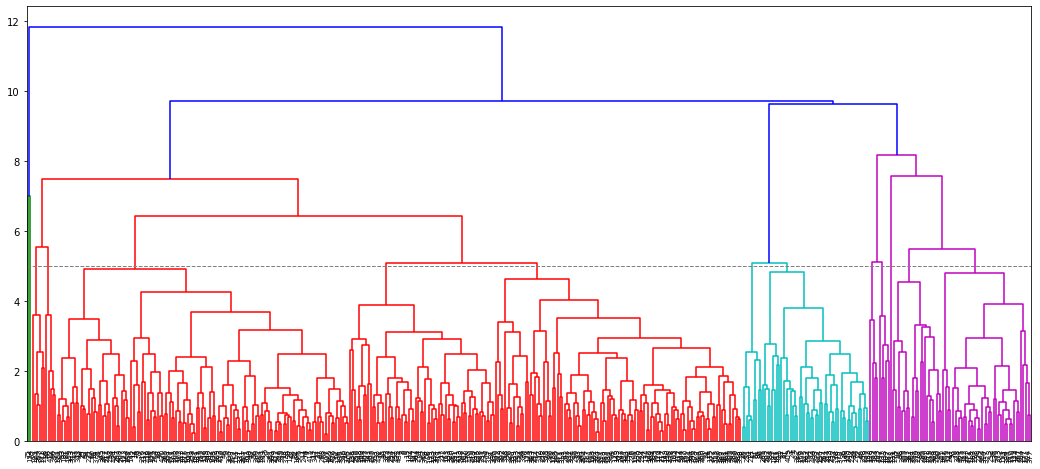

In [0]:
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster
fig, ax= plt.subplots(figsize=(18,8))
mergings=linkage(ps,method='complete')
dendrogram(mergings,  leaf_rotation=90,leaf_font_size=7)
plt.axhline(y=5, c='grey', lw=1, linestyle='dashed')
plt.show()

When there are many observations, the leaves become unreadable. In that case, we have to truncate the dendrogram to a readable size. We can decide the level in which case, no more than the decided 'p' level is displayed. A truncated part of the above dendrogram is shown here.

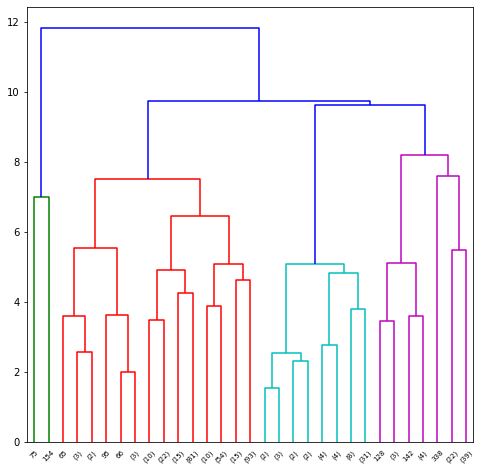

In [0]:
fig, ax= plt.subplots(figsize=(8,8))
dendrogram(mergings, truncate_mode = 'level', p=5,leaf_font_size=7)
plt.show()
